
<div>
<img src="https://drive.google.com/uc?export=download&id=1lhTXu7FShFdtXWptJH3ZOPyxOdFY8kOf" width="500"/>
</div>


## Pontificia Universidad Javeriana

#### Departamento de Ingeniería Electrónica

#### Inteligencia Artificial

## Proyecto 1

Alumnos: Carlos Roberto Ávila Hernández

Profesor: Alexander Caicedo Dorado


# Clasificación lineal: MNIST

La base de datos MNIST se considera un ejercicio clasico en el área de machine learning. Esta base de datos cuenta con un conjunto de imagenes de digitos manuscritos desde el 0 hasta el 9, la cual se encuentra en en la libreria de scikit-learn. Información sobre el dataset la pueden encontrar [aquí](http://yann.lecun.com/exdb/mnist/), mientras que una explicación sobre la función en python, especificamente la libreria sci-kit learn, pueden encontrarla [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Está base de dato tiene imagénes de carácteres escritos desde el 0 hasta el 9. El profesor Alexander quiere que ustedes utilicen sus conocimientos en Machine Learning para resolver este problema.

Para este problema deben realizar las siguientes tareas:

1. Cargen los datos *digits* de la librería scikit learn.
2. Realicen un análisis descriptivo de la información contenida en las imagenes. Grafiquen los números, discutan sobre sus carácteristicas y demás información que consideren importante.
3. Implementen un clasificador usando KNN. Determine una forma de evaluar el rendimiento de este clasificador para diferentes valores de K.
4. Implemente un clasificador utilizando regresión logística. Para esto desarrolle 10 clasificadores diferentes (porque se tienen 10 clases). Implemente la función de decisión de clase, escogiendo como clase la salida correspondiente al clasificador con mayor probabilidad.
5. Para cada uno de los 10 clasificadores, ubique los $\theta_i$, para $i~= 0$  en una matriz siguiendo el mismo orden que las matrices de los datos de entrenamiento, y realice un mapa de calor para cada clasificador, indicando la clase que detecta.
6. Implemente un clasificador multinomial utilizando funciones de scikit-learn.
7. Compare los resultados.

Como el objetivo es evaluar sus conocimientos en clasificación, deben responder las siguientes preguntas:

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?
2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Porqué?
3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?
4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.

## 1. Carga de Datos

In [1]:
# Se importan las librerías necesarias
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Se cargan los datos
digits = load_digits()

In [2]:
# Se muestra la descripción de los datos
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

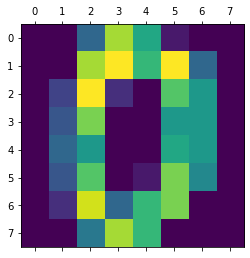

In [3]:
# Se se muestra una de las imágenes
plt.gray
plt.matshow(digits.images[0])
plt.show()

## 2. Análisis Descriptivo de los Datos



**Vistazo General**: Podemos observar algunas filas del conjunto de datos para conocer su esctructura y ver sus dimensiones.

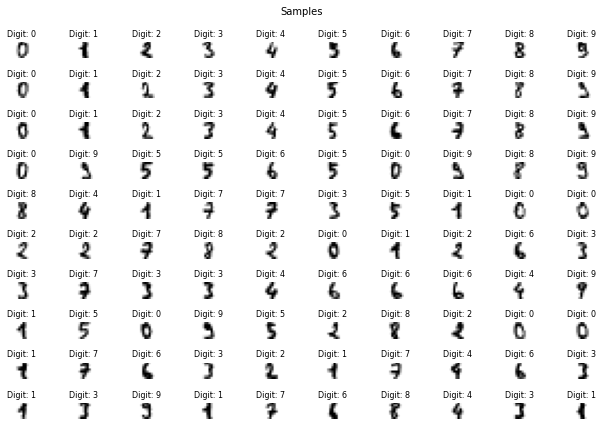

In [4]:
# Se muestran las primeras mxn imágenes de los dígitos
def show_numbers(rows, cols, data, targets, size=(8,8), suptitle = None, knn = None):
    plt.figure(figsize=(size))

    if suptitle:
        plt.suptitle(suptitle, fontsize=10)

    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)

        try:
            plt.imshow(data[i].reshape(8, 8), cmap='binary', vmin=min(data[i]), vmax=max(data[i]))
            knn_label = ('\n' + f'KNN: {knn[i]}') if knn else ''
            label = str(targets[i])  + knn_label

            plt.title(f'Digit: {label}', fontsize=8, color='black')
        except:
            plt.imshow(np.array([0 for i in range(64)]).reshape(8,8), cmap = 'binary')

        plt.axis('off')



    plt.tight_layout()
    plt.show()

show_numbers(10, 10, digits.data, digits.target, (9, 6), suptitle="Samples")

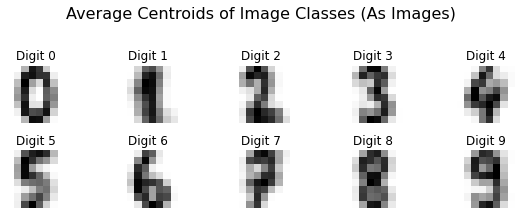

In [5]:

# Calculate class-wise statistics
class_statistics = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Average centroid of each class
    class_centroid = np.mean(digit_data, axis=0)

    class_statistics.append(class_centroid)

# Convert the list of class centroids to a NumPy array
class_centroids = np.array(class_statistics)

# Plot the average centroids of the images as images
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_image = class_centroids[i].reshape(8, 8)
    plt.imshow(digit_image, cmap='gray_r', interpolation='nearest')
    plt.title(f'Digit {i}')
    plt.axis('off')

plt.suptitle('Average Centroids of Image Classes (As Images)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the image of average centroids
plt.show()

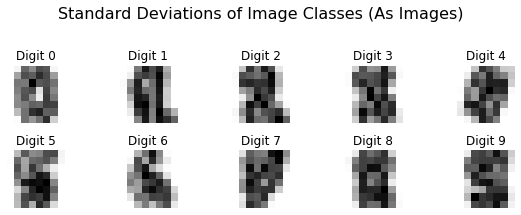

In [6]:
# Calculate class-wise statistics
class_deviations = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Standard deviation of each pixel within the class
    class_deviation = np.std(digit_data, axis=0)

    class_deviations.append(class_deviation)

# Convert the list of class deviations to a NumPy array
class_deviations = np.array(class_deviations)

# Plot the deviations of the images as images
plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_image = class_deviations[i].reshape(8, 8)
    plt.imshow(digit_image, cmap='gray_r', interpolation='nearest')
    plt.title(f'Digit {i}')
    plt.axis('off')

plt.suptitle('Standard Deviations of Image Classes (As Images)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the image of class deviations
plt.show()


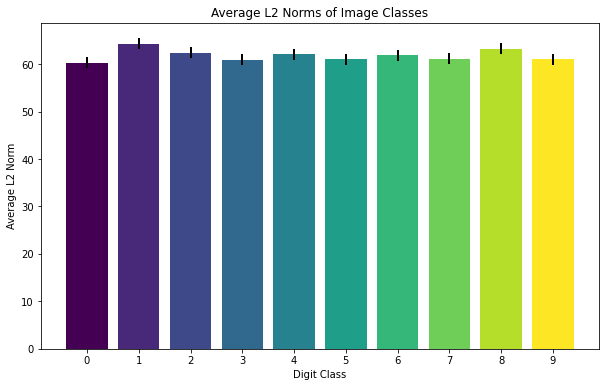

In [7]:
# Calculate class-wise average L2 norms
class_norms = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Calculate the L2 norm for each image in the class
    norms = np.linalg.norm(digit_data, axis=1)

    # Calculate the average norm for the class
    avg_norm = np.mean(norms)

    class_norms.append(avg_norm)

# Create a color map for the bars
colors = plt.get_cmap('viridis', len(class_norms))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average L2 norms with error bars
plt.bar(range(10), class_norms, tick_label=list(range(10)), color=colors(range(10)))
plt.errorbar(range(10), class_norms, yerr=np.std(class_norms), fmt='none', ecolor='black', elinewidth=2)

# Customize the plot
plt.title('Average L2 Norms of Image Classes')
plt.xlabel('Digit Class')
plt.ylabel('Average L2 Norm')
plt.xticks(range(10))

# Show the plot
plt.show()


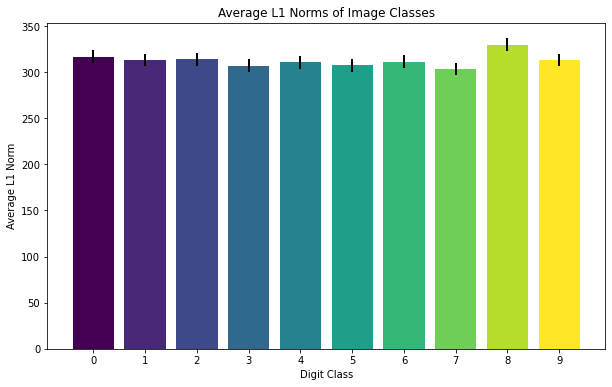

In [8]:
# Calculate class-wise average L1 norms
class_norms_l1 = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Calculate the L1 norm for each image in the class
    norms_l1 = np.linalg.norm(digit_data, ord=1, axis=1)

    # Calculate the average L1 norm for the class
    avg_norm_l1 = np.mean(norms_l1)

    class_norms_l1.append(avg_norm_l1)

# Create a color map for the bars
colors = plt.get_cmap('viridis', len(class_norms_l1))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average L1 norms with error bars
plt.bar(range(10), class_norms_l1, tick_label=list(range(10)), color=colors(range(10)))
plt.errorbar(range(10), class_norms_l1, yerr=np.std(class_norms_l1), fmt='none', ecolor='black', elinewidth=2)

# Customize the plot
plt.title('Average L1 Norms of Image Classes')
plt.xlabel('Digit Class')
plt.ylabel('Average L1 Norm')
plt.xticks(range(10))

# Show the plot
plt.show()


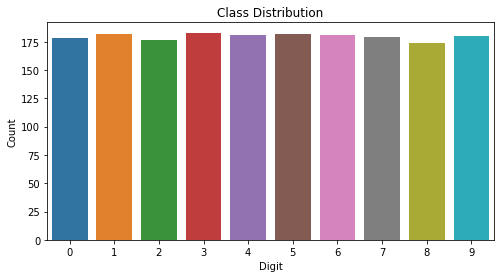

In [9]:
# Class Distribution Analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=digits)
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')

# Save the class distribution plot
plt.savefig('class_distribution.png')

# Show the class distribution plot
plt.show()

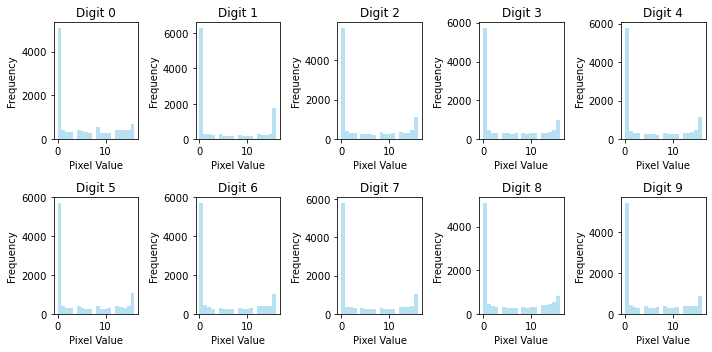

In [10]:
# Summary Statistics
mean_pixel_values = np.mean(digits.data, axis=0)
std_pixel_values = np.std(digits.data, axis=0)

# Data Visualization
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_data = digits.data[digits.target == i]
    plt.hist(digit_data.ravel(), bins=20, color='skyblue', alpha=0.6)
    plt.title(f'Digit {i}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()

# Save the data visualization plot
plt.savefig('data_visualization.png')

# Show the data visualization plot
plt.show()

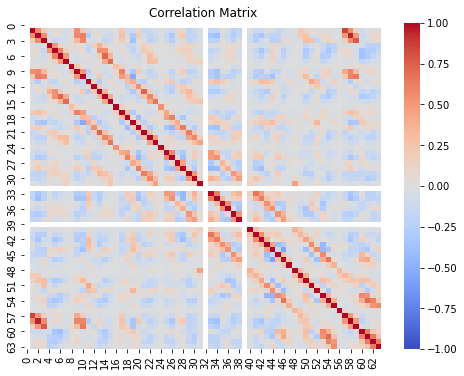

In [11]:
# Correlation Analysis
correlation_matrix = np.corrcoef(digits.data, rowvar=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Matrix')

# Save the correlation analysis plot
plt.savefig('correlation_analysis.png')

# Show the correlation analysis plot
plt.show()

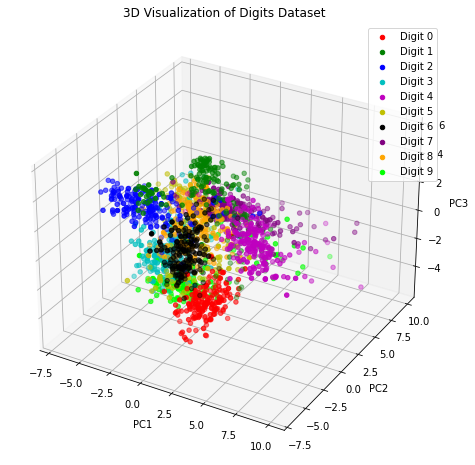

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each class
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

# Scatter plot each data point with its class color
for i in range(10):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], c=colors[i], label=f'Digit {i}')

# Customize the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of Digits Dataset')
ax.legend()

plt.show()


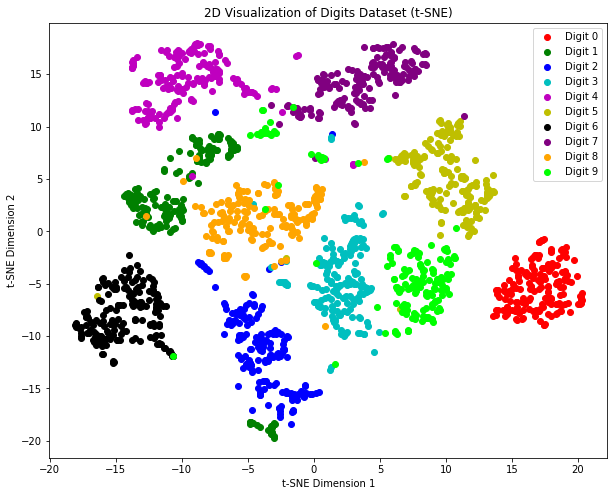

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Create a 2D scatter plot using t-SNE coordinates
plt.figure(figsize=(10, 8))

# Define colors for each class
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

# Scatter plot each data point with its class color
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=f'Digit {i}')

# Customize the plot
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D Visualization of Digits Dataset (t-SNE)')
plt.legend()

plt.show()


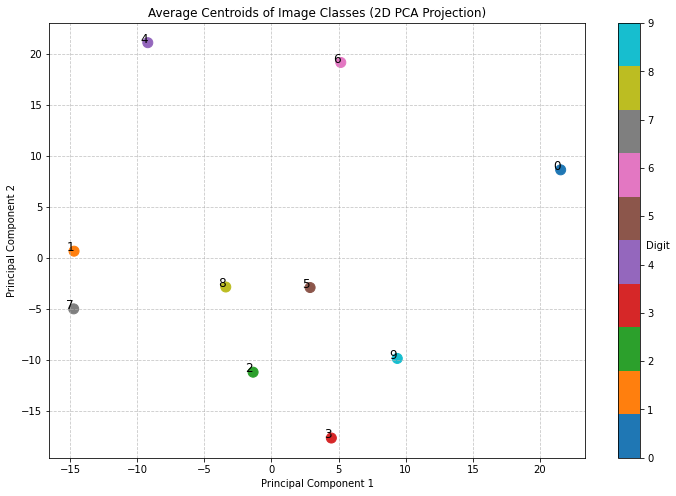

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Load the digits dataset
digits = load_digits()

# Calculate class-wise statistics
class_statistics = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Average centroid of each class
    class_centroid = np.mean(digit_data, axis=0)

    class_statistics.append(class_centroid)

# Convert the list of class centroids to a NumPy array
class_centroids = np.array(class_statistics)

# Use PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
class_centroids_pca = pca.fit_transform(class_centroids)

# Define labels for each class
class_labels = [str(i) for i in range(10)]

# Create a custom colormap with distinct colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
custom_cmap = ListedColormap(colors)

# Plot the average centroids in 2D with labels and a custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(class_centroids_pca[:, 1], class_centroids_pca[:, 0], c=range(10), cmap=custom_cmap, s=100)
plt.title('Average Centroids of Image Classes (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label('Digit', rotation=0)
for i, label in enumerate(class_labels):
    plt.annotate(label, (class_centroids_pca[i, 1], class_centroids_pca[i, 0]), fontsize=12, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## 3. Clasificador K-Nearest Neighbors

#### **Implementación desde Cero**

A continuación, se desarrollará un clasificador KNN desde cero, partiendo desde una matriz que contenga todos nuestros datos incluyendo la salida.

In [15]:
# Datos X
X = digits.data

# Labels
y = digits.target

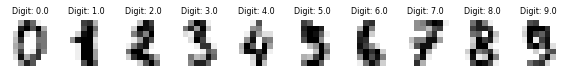

In [16]:
# Matriz aumentada (inlucyendo los datos de salida)
Xa = np.column_stack((np.array(X), y))

show_numbers(1, 10, Xa[:, :-1], Xa[:, -1])

Supongamos que tenemos $m$ elementos en $\mathbb{R}^{n}$, con:

$$\mathbf{x}^{(i)}=\left[\begin{array}{c}
    x_1^{(i)} \\
    x_2^{(i)} \\
    \vdots \\
    x_n^{(i)} \\
\end{array}\right] \in \mathbb{R}^{n}
$$

Donde cada $\mathbf{x}^{(i)}$ tiene su correspondiente salida $y^{(i)}$ y $y^{(i)} \in C = \{0,1,2, \dots, c\}$ con $c$ siendo el número total de clases.

Podemos agrupar dichos elementos en una matriz $\mathbf{D}$. Esta matriz contiene cada uno de los vectores y está aumentada para contener sus respectivas salidas:

$$\mathbf{D} = \left[\begin{array}{c|c}
    \left(\mathbf{x}^{(1)}\right)^T & y^{(1)} \\
    \left(\mathbf{x}^{(2)}\right)^T & y^{(2)} \\
    \vdots & \vdots \\
    \left(\mathbf{x}^{(m)}\right)^T & y^{(m)} \\
\end{array}\right]
$$

$$
\mathbf{D} = \left[\begin{array}{ccccc|c}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \ldots & x_{n}^{(1)} & y^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \ldots & x_{n}^{(2)} & y^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    x_{1}^{(m)} & x_{2}^{(m)} & x_{3}^{(m)} & \ldots & x_{n}^{(m)} & y^{(m)} \\
\end{array}\right]
$$

In [17]:
# Se convierte la matriz a una lista normal de Python
Xa = Xa.tolist()

print(f"\nDimensiones: {len(Xa)} x {len(Xa[0])}")


Dimensiones: 1797 x 65


Ahora, seperaremos los datos para crear los conjuntos de entrenamiento y de prueba.

In [18]:
import random
import math

def separate_set(set, proportion):
    # Se mezclan los datos
    random.shuffle(set)

    # Total de datos
    n = len(set)

    # Datos para el conjunto de entrenamiento
    training_n = math.ceil(len(set)*proportion/100)

    # Datos para el conjunto de prueba
    test_n = n - training_n

    training_set = set[0: training_n]
    test_set = set[training_n::]

    return training_set, test_set

In [19]:
training_data, test_data = separate_set(Xa, 80)

print(f"Total de datos de Entrnamiento: {len(training_data)}")
print(f"Total de Datos de Prueba {len(test_data)}")

Total de datos de Entrnamiento: 1438
Total de Datos de Prueba 359


Para implementar el clasificador, podemos tomar en cuenta distintos tipos de métricas. A continuación, se crea la función que retorna la distancia $L_p$ entre dos vectores $x_i^{(1)}, x_i^{(2)} \in \mathbb{R}^n$, definida de la siguiente manera:

$$L_p = \left[ \sum_{i=1}^n \left| x_i^{(1)} - x_i^{(2)} \right|^p \right]^{\frac{1}{p}}$$

In [20]:
def lp_distance(a, b, p):

    # Se verifica que los vectores sean de la misma dimensión
    if len(a) != len(b):
        print("Vectors must have the same dimensions.")
        return

    if p == "inf":
        diff_vector = []
        for i in range(len(a)):
            diff_vector.append( abs( a[i] - b[i] ) )

        return max(diff_vector)

    # Se suman las potencias p de las diferencias en las dimensiones
    s = 0

    for i in range(len(a)):
        s += math.pow( abs(a[i] - b[i]), p)

    # Se obtiene la raíz p-ésima de la suma
    d = math.pow(s, 1/p)

    return d

A continuación se muestra un ejemplo con la distancia Manhattan, Euclídea y Media de los vectores:

$$\mathbf{a} = [1.1, 2.2, 3.3] , \quad \mathbf{b} = [4.4, 5.5, 6.6]$$

In [21]:
a = [1.1, 2.2, 3.3]
b = [4.4, 5.5, 6.6]

print(f"Distancia Manhattan (p = 1): {lp_distance(a, b, 1)}")
print(f"Distancia Media (p = 1.5): {lp_distance(a, b, 1.5)}")
print(f"Distancia Euclídea (p = 2): {lp_distance(a, b, 2)}")
print(f"Distancia L_inf (p = oo): {lp_distance(a, b, 'inf')}")

Distancia Manhattan (p = 1): 9.899999999999999
Distancia Media (p = 1.5): 6.864276616071283
Distancia Euclídea (p = 2): 5.715767664977295
Distancia L_inf (p = oo): 3.3000000000000003


In [22]:
def classify(entry, data, k, metric):

    # Se crea una lista donde se guarda la distancia del input con cada dato y su respectiva clase
    distances_list = [ {"distance": lp_distance(v[:-1], entry, metric), "class": v[-1]} for v in data]

    # Se ordena el diccionario respecto a las distancias
    distances_list = sorted(distances_list, key= lambda x: x['distance'])

    # Se toman en cuenta los primeros k vecinos
    neighbors = distances_list[:k]

    # Se toman las clases de los vecinos
    neighbor_classes = [n["class"] for n in neighbors]

    # Se cuentan las ocurrencias de cada clase en los vecinos
    neighbors_count = {}

    for nc in neighbor_classes:
        if nc in neighbors_count:
            neighbors_count[nc] += 1
        else:
            neighbors_count[nc] = 1

    # Se selecciona la clase con mayor ocurrencias
    max_class = max(neighbors_count.values())
    max_class_neighbors = [neighbor for neighbor, occurrences in neighbors_count.items() if occurrences == max_class]
    prediction = random.choice(max_class_neighbors)

    return prediction

Con esto ya podemos realizar clasificaciones individuales introduciendo los datos de una observación. A continuación, se extraerá al azar un dato del conjunto de prueba:

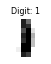

Dígito real: 1


In [23]:
# Se extrae un dato al azar
sample = random.choice(test_data)

individual_test = classify(sample[:-1], training_data, 5, 2)

def show_number(number, label, size=(1,1)):
    show_numbers(1, 1, [np.array(number)], [int(label)], size)

show_number(sample[:-1], individual_test)

print(f"Dígito real: {int(sample[-1])}")

Ahora, se procederá a evaluar todo el conjunto de prueba y separar las clasificaciones correctas de las incorrectas.

In [24]:
def evaluate_knn_classifier(training_set, test_set, k, metric):
    correct_predictions = []
    incorrect_predictions = []

    for observation in test_data:

        # Clase real de la observación
        real_digit = observation[-1]

        # Vector de observación
        digit_data = observation[:-1]

        # Predicción del modelo
        prediction = classify(digit_data, training_set, k, metric)

        if prediction == real_digit:
            correct_predictions.append(observation)
        else:
            incorrect_predictions.append( { "data": observation, "prediction" : prediction })

    return correct_predictions, incorrect_predictions

Para esta evaluación, se utilizarán $k = 5$ vecinos y la distancia $L_2$:

In [25]:
correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, 5, 2)


Classifier Results:

Total Predictions: 359
Correct Predictions: 353
Incorrect Predictions: 6
Accuracy: 98.33%



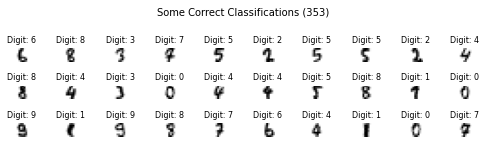

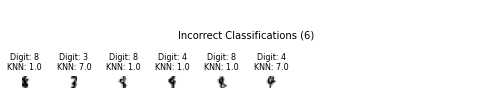

In [26]:
def display_classifier_results(correct_predictions, incorrect_predictions):
    total_predictions = len(correct_predictions) + len(incorrect_predictions)
    accuracy = len(correct_predictions) / total_predictions

    print("\nClassifier Results:\n")
    print(f"Total Predictions: {total_predictions}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2%}")
    print("")

    # Se muestran algunos datos correctos
    cp_data = [c[:-1] for c in correct_predictions]
    cp_targets = [c[-1] for c in correct_predictions]
    l = f"Some Correct Classifications ({len(cp_data)})"
    show_numbers(3, 10, np.array(cp_data), np.array([int(t) for t in cp_targets]), (7,2), l)


    # Se muestran los datos clasificados erroneamente
    icp_data = [c["data"][:-1] for c in incorrect_predictions]
    icp_targets = [c["data"][-1] for c in incorrect_predictions]
    icp_predictions = [c["prediction"] for c in incorrect_predictions]
    l = f"\n\nIncorrect Classifications ({len(icp_data)})\n"
    show_numbers(1, 10, np.array(icp_data), np.array([int(t) for t in icp_targets]), (7,1.3), l, icp_predictions)

display_classifier_results(correct_predictions, incorrect_predictions)

 ### Rendimiento del Clasificador según $k$

A continuación, emplearemos una implementación compacta y orientada a objetos del clasificador para evaluar su rendimiento en función de diferentes valores de $k$ y la métrica utilizada para medir la distancia. 

Además, aplicaremos un proceso de normalización a los datos del conjunto 'digits' proporcionado por scikit-learn. La normalización es beneficiosa en este contexto, ya que ayuda a mantener la coherencia y la equidad en las comparaciones entre distintas métricas y valores de $k$. Al escalarse los datos a una escala común, aseguramos que todas las características contribuyan de manera equitativa en la medición de distancias, lo que puede mejorar la robustez y la interpretabilidad de los resultados obtenidos en nuestra evaluación.

In [27]:
    def normalize_entry(entry, mean, std):
        normalized_entry = [ (xi - mean[i]) / std[i] for i, xi in enumerate(entry)]
        return normalized_entry

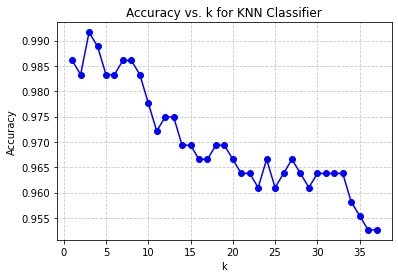

In [28]:
k_values = list(range(1, int(len(training_data) ** 0.5) + 1))

# Create empty lists to store accuracy scores
accuracy_scores = []

# Loop through different values of k
for k in k_values:
    correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, k, 2)
    accuracy = len(correct_predictions) / (len(correct_predictions) + len(incorrect_predictions))
    accuracy_scores.append(accuracy)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the accuracy scores with a blue line and markers
ax.plot(k_values, accuracy_scores, marker='o', color='b', linestyle='-')

# Label the axes and add a title
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs. k for KNN Classifier')

# Add grid lines and customize the appearance
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

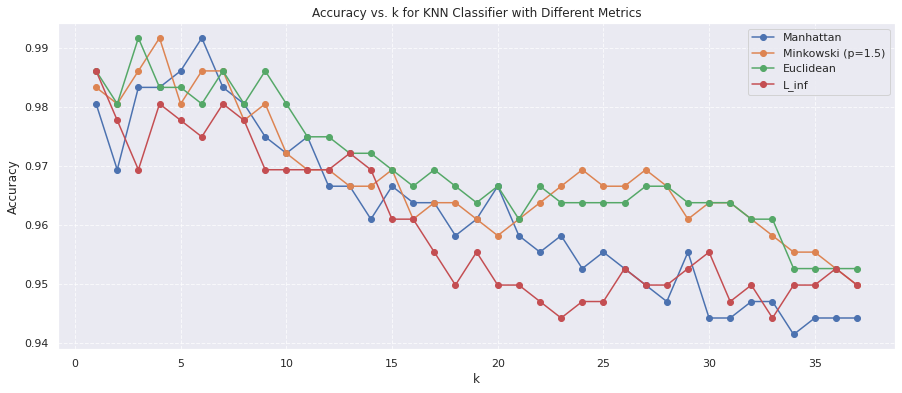

In [43]:

# Function to evaluate KNN classifier with different metrics
def evaluate_knn_metrics(training_data, test_data, k_values, metrics):
    accuracy_scores = []
    metric_labels = []

    for metric_name, metric_value in metrics.items():
        accuracy_scores_metric = []
        
        for k in k_values:
            correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, k, metric_value)
            accuracy = len(correct_predictions) / (len(correct_predictions) + len(incorrect_predictions))
            accuracy_scores_metric.append(accuracy)
        
        accuracy_scores.append(accuracy_scores_metric)
        metric_labels.append(metric_name)
    
    return accuracy_scores, metric_labels

# Function to plot accuracy scores for different metrics
def plot_accuracy_vs_k(k_values, accuracy_scores, metric_labels):
    sns.set_theme()
    plt.figure(figsize=(15, 6))

    for i, metric_label in enumerate(metric_labels):
        plt.plot(k_values, accuracy_scores[i], marker='o', label=metric_label)

    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k for KNN Classifier with Different Metrics')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Define the metrics and their corresponding values
metrics = {
    'Manhattan': 1,
    'Minkowski (p=1.5)': 1.5,
    'Euclidean': 2,
    'L_inf': "inf"
}

# Define the range of k values
k_values = list(range(1, int(len(training_data) ** 0.5) + 1))

# Evaluate accuracy scores for different metrics
accuracy_scores, metric_labels = evaluate_knn_metrics(training_data, test_data, k_values, metrics)

# Plot accuracy scores
plot_accuracy_vs_k(k_values, accuracy_scores, metric_labels)


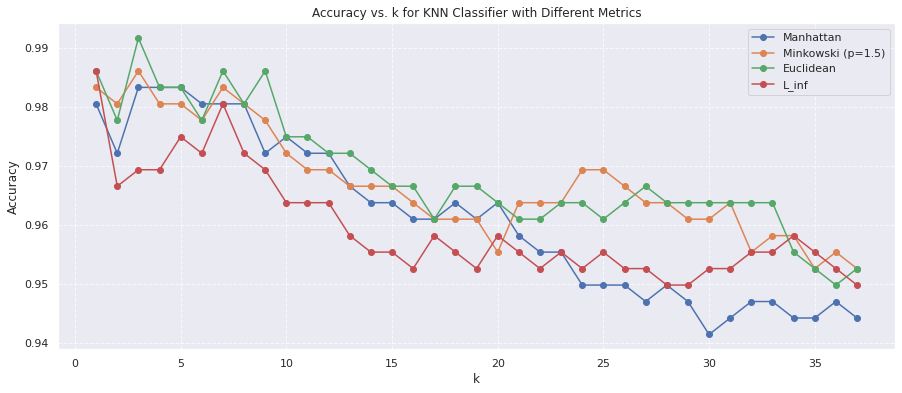

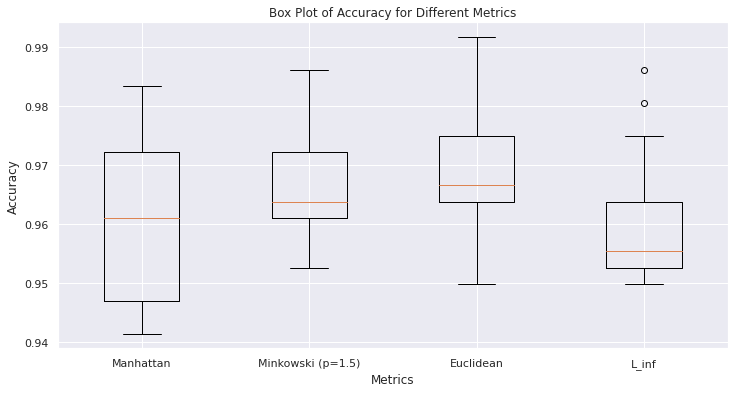

In [42]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert training_data and test_data to NumPy arrays
training_data = np.array(training_data)
test_data = np.array(test_data)

# Define the range of k values
k_values = list(range(1, int(len(training_data) ** 0.5) + 1))

# Define the metrics and their corresponding distance metric classes
metrics = {
    'Manhattan': 'manhattan',
    'Minkowski (p=1.5)': 1.5,
    'Euclidean': 'euclidean',
    'L_inf': 'chebyshev',
}

# Create a dictionary to store accuracy scores for each metric
accuracy_scores = {metric_name: [] for metric_name in metrics}

for metric_name, metric_identifier in metrics.items():
    accuracy_scores_metric = []
    
    for k in k_values:
        # Create KNN classifier with the specified metric
        if metric_identifier == 1.5:
            # For Minkowski with p=1.5
            knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1.5)
        else:
            knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric_identifier)
        
        # Fit the classifier to the training data
        knn_classifier.fit(training_data[:, :-1], training_data[:, -1])
        
        # Make predictions on the test data
        y_pred = knn_classifier.predict(test_data[:, :-1])
        
        # Calculate and append accuracy
        accuracy = accuracy_score(test_data[:, -1], y_pred)
        accuracy_scores_metric.append(accuracy)
    
    accuracy_scores[metric_name] = accuracy_scores_metric

# Plot accuracy scores
sns.set_theme()
plt.figure(figsize=(15, 6))

for metric_name, accuracy_scores_metric in accuracy_scores.items():
    plt.plot(k_values, accuracy_scores_metric, marker='o', label=metric_name)

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN Classifier with Different Metrics')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Box plot
plt.figure(figsize=(12, 6))
plt.boxplot(list(accuracy_scores.values()), labels=list(accuracy_scores.keys()))
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Box Plot of Accuracy for Different Metrics')
plt.show()


## 4. Regresión Logística